In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


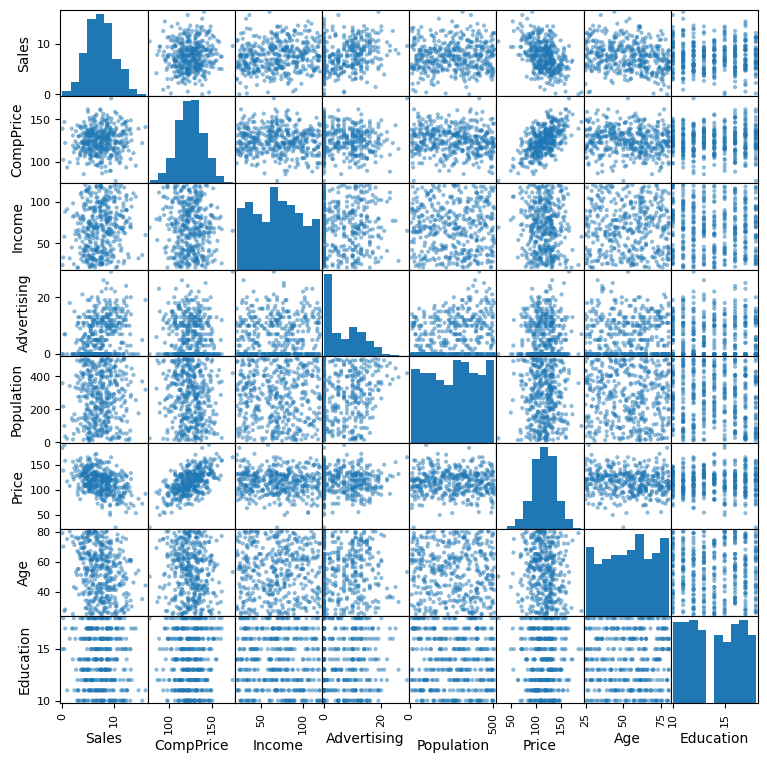

In [11]:
pd.plotting.scatter_matrix(Carseats, figsize=(9, 9));

In [3]:
y = Carseats['Sales']
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [15]:
Carseats.columns.drop('Sales')

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [16]:
predictors = Carseats.columns.drop('Sales')
X = MS(predictors).fit_transform(Carseats)
X.head()

,intercept,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes]
0,1.0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0
1,1.0,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0
2,1.0,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0
3,1.0,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0
4,1.0,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0


In [17]:
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,5.6606,0.603,9.380,0.000
CompPrice,0.0928,0.004,22.378,0.000
Income,0.0158,0.002,8.565,0.000
Advertising,0.1231,0.011,11.066,0.000
Population,0.0002,0.000,0.561,0.575
Price,-0.0954,0.003,-35.700,0.000
ShelveLoc[Good],4.8502,0.153,31.678,0.000
ShelveLoc[Medium],1.9567,0.126,15.516,0.000
Age,-0.0460,0.003,-14.472,0.000
Education,-0.0211,0.020,-1.070,0.285


In [34]:
predictors = Carseats.drop(['Urban', 'Education', 'Population', 'US', 'Sales'], axis=1).columns
X = MS(predictors).fit_transform(Carseats)
X.head()

,intercept,CompPrice,Income,Advertising,Price,ShelveLoc[Good],ShelveLoc[Medium],Age
0,1.0,138,73,11,120,0.0,0.0,42
1,1.0,111,48,16,83,1.0,0.0,65
2,1.0,113,35,10,80,0.0,1.0,59
3,1.0,117,100,4,97,0.0,1.0,55
4,1.0,141,64,3,128,0.0,0.0,38


In [35]:
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,5.4752,0.505,10.842,0.0
CompPrice,0.0926,0.004,22.451,0.0
Income,0.0158,0.002,8.590,0.0
Advertising,0.1159,0.008,15.006,0.0
Price,-0.0953,0.003,-35.699,0.0
ShelveLoc[Good],4.8357,0.152,31.710,0.0
ShelveLoc[Medium],1.9520,0.125,15.569,0.0
Age,-0.0461,0.003,-14.521,0.0


In [37]:
results2.conf_int(alpha=.05)

,0,1
intercept,4.482368,6.468084
CompPrice,0.084465,0.100678
Income,0.012172,0.019398
Advertising,0.100719,0.131088
Price,-0.100568,-0.090069
ShelveLoc[Good],4.535857,5.135492
ShelveLoc[Medium],1.705501,2.198484
Age,-0.052373,-0.039882


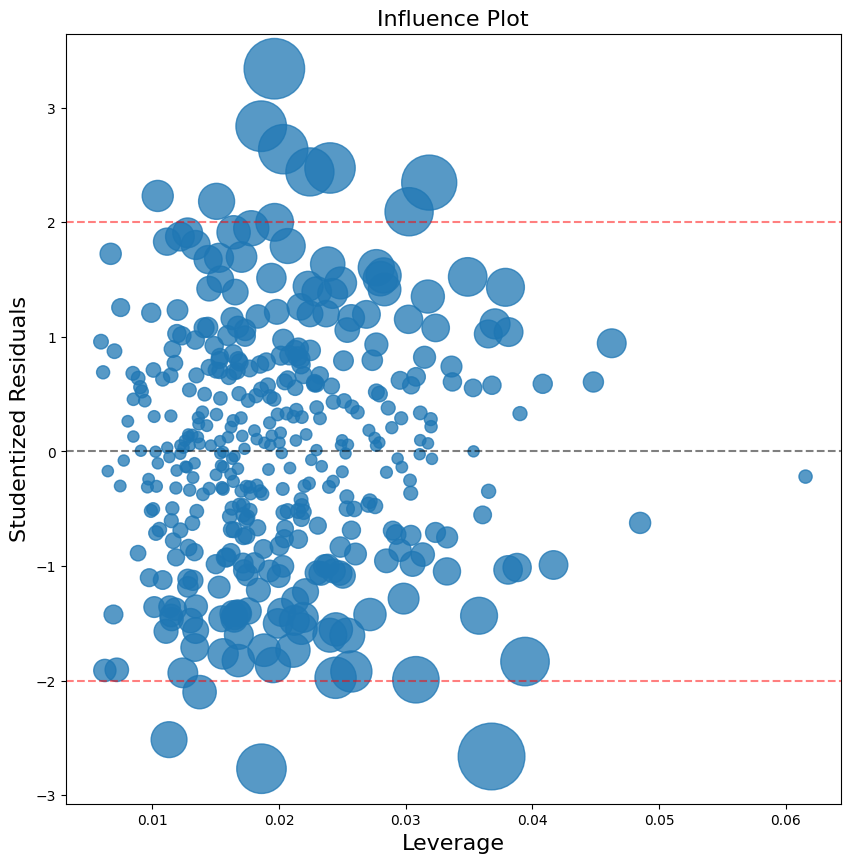

In [40]:
_, ax = plt.subplots(figsize=(10, 10))
smg.influence_plot(results2, ax=ax)
ax.axhline(0, c='k', linestyle='--', alpha=.5)
ax.axhline(2, c='r', linestyle='--', alpha=.5)
ax.axhline(-2, c='r', linestyle='--', alpha=.5)
# remove all labels
for txt in ax.texts:
    txt.set_visible(False)